# Using Vision Language Models with transformers
You can infer with Llava using the LlavaNext model as shown below.

Let’s initialize the model and the processor first.

# References
- https://huggingface.co/blog/vlms#fine-tuning-vision-language-models-with-trl

Let’s initialize the model and the processor first.

In [1]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")
model = LlavaNextForConditionalGeneration.from_pretrained(
    "llava-hf/llava-v1.6-mistral-7b-hf",
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True
)
model.to(device)

preprocessor_config.json:   0%|          | 0.00/754 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.85k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

LlavaNextForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): Q

We now pass the image and the text prompt to the processor, and then pass the processed inputs to the generate.

 Note that each model uses its own prompt template, be careful to use the right one to avoid performance degradation.

In [6]:
from PIL import Image
import requests

url = "https://github.com/haotian-liu/LLaVA/blob/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg?raw=true"
image = Image.open(requests.get(url, stream=True).raw)
prompt = "[INST] <image>\nWhat is shown in this image? [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to(device)
output = model.generate(**inputs, max_new_tokens=100)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'

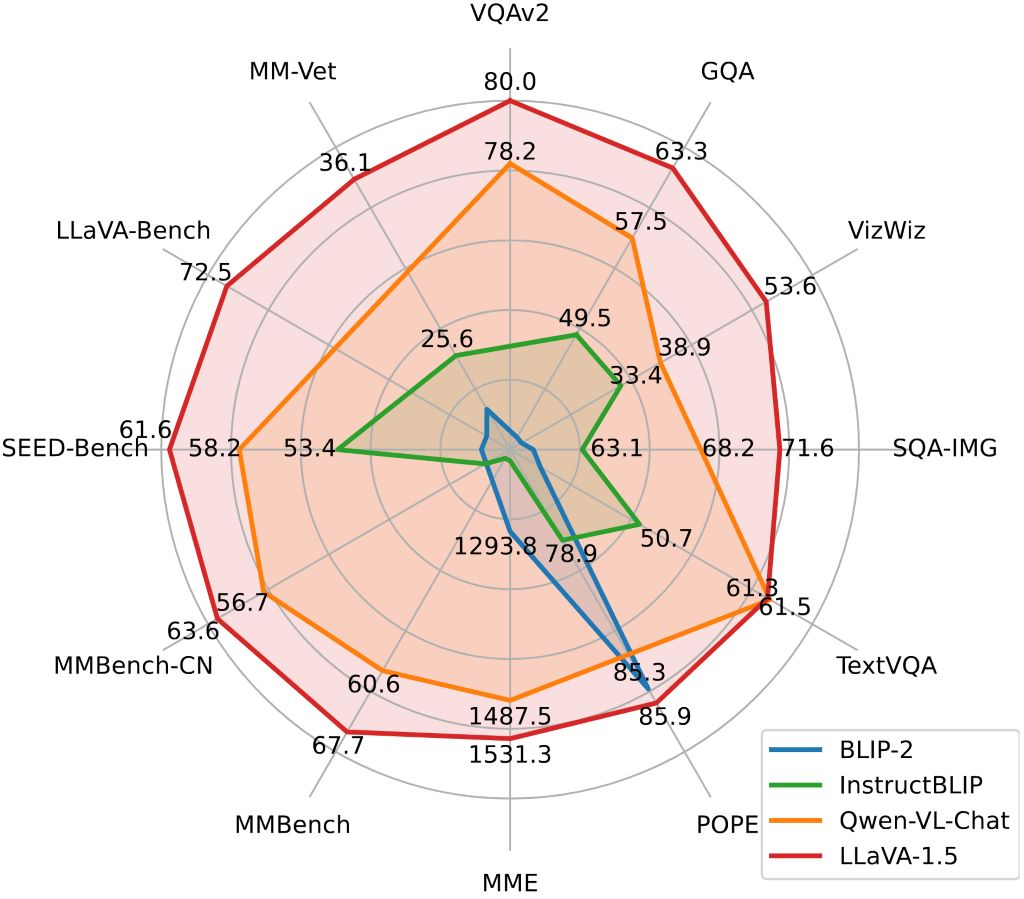

In [5]:
image

Call decode to decode the output tokens.

In [8]:
print(processor.decode(output[0], skip_special_tokens=True))

NameError: name 'output' is not defined